##### Convolutional Neural Networks

#### Convolutions

Convolution Operation forms the basic building block for any signal processing application(including image processing / computer vision)

Convolution is a mathematical operation performed on 2 functions(f and g) to produce a third function, that is typically viewed as a modified version of one of the original functions.

If we assume f to be the original function, g can be called a filter (or kernel) that produces a desired effect on f creating an output f'.

<img src="https://raw.githubusercontent.com/pracasrv/machine-learning-getting-started-ws/master/illustration-images/convolution_overview.png"> 
<img src="https://raw.githubusercontent.com/pracasrv/machine-learning-getting-started-ws/master/illustration-images/conv_step1.gif"> 
<img src="https://raw.githubusercontent.com/pracasrv/machine-learning-getting-started-ws/master/illustration-images/conv_step2.gif"> 

##### Convolutional Neural Networks - The Network Architecture

![Convolutional Neural Network](https://raw.githubusercontent.com/pracasrv/machine-learning-getting-started-ws/master/illustration-images/cnn.png)

In [1]:
##### We need the imutils library which is not default in google colab
!pip install imutils

In [0]:
!rm -r data

In [0]:
##### downlaod the dogs and cats dataset and save it to a local directory called data
!mkdir data && wget http://files.fast.ai/data/dogscats.zip && unzip dogscats.zip -d data/


Redirecting output to ‘wget-log.2’.
Archive:  dogscats.zip
   creating: data/dogscats/
   creating: data/dogscats/sample/
   creating: data/dogscats/sample/train/
   creating: data/dogscats/sample/train/cats/
  inflating: data/dogscats/sample/train/cats/cat.2921.jpg  
  inflating: data/dogscats/sample/train/cats/cat.394.jpg  
  inflating: data/dogscats/sample/train/cats/cat.4865.jpg  
  inflating: data/dogscats/sample/train/cats/cat.3570.jpg  
  inflating: data/dogscats/sample/train/cats/cat.2266.jpg  
  inflating: data/dogscats/sample/train/cats/cat.9021.jpg  
  inflating: data/dogscats/sample/train/cats/cat.11737.jpg  
  inflating: data/dogscats/sample/train/cats/cat.4600.jpg  
   creating: data/dogscats/sample/train/dogs/
  inflating: data/dogscats/sample/train/dogs/dog.1402.jpg  
  inflating: data/dogscats/sample/train/dogs/dog.1614.jpg  
  inflating: data/dogscats/sample/train/dogs/dog.8643.jpg  
  inflating: data/dogscats/sample/train/dogs/dog.6391.jpg  
  inflating: data/dogsca

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Activation
from keras.optimizers import SGD
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.utils import np_utils
from imutils import paths
import keras
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2

Using TensorFlow backend.


In [5]:
#### Extract a list of image file names from the directory to visualise
PATH = 'data/dogscats/'
#### run the list files command and get the top results and save it into a list object
files = !ls {PATH}valid/cats | head 
print(files)

['cat.10016.jpg', 'cat.1001.jpg', 'cat.10026.jpg', 'cat.10048.jpg', 'cat.10050.jpg', 'cat.10064.jpg', 'cat.10071.jpg', 'cat.10091.jpg', 'cat.10103.jpg', 'cat.10104.jpg']


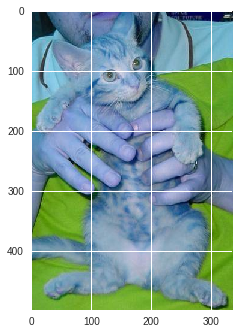

In [6]:
#### Open and Visualise a Single Image
img_path = PATH +'valid/cats/'+files[1]
img = cv2.imread(img_path)
plt.imshow(img)
plt.show()

In [0]:
#### Lets intialise some list variables
data = []
labels = []
dataset_path = 'data/dogscats/train'

#### the imutils paths.list_images function will return the full path of all images
#### in the current directory and its sub-directories
imagePaths = list(paths.list_images(dataset_path))

In [9]:
##### Iterate through all the imagepaths generated previously and load every image
##### figure out the label of the image from its path

for (i, imagePath) in enumerate(imagePaths):
    image = cv2.imread(imagePath)
    
    #### Extract the label of the image from the image path
    label = imagePath.split(os.path.sep)[-1].split(".")[0]
   
    #### Resize the Image and then use the raw pixel values as features
    features = cv2.resize(image, (32, 32))
    
    #### Append the features and labels to our list variables
    data.append(features)
    labels.append(label)
    
    # show an update every 1,000 images
    if i > 0 and i % 1000 == 0:
        print("[INFO] processed {}/{}".format(i, len(imagePaths)))

[INFO] processed 1000/23000
[INFO] processed 2000/23000
[INFO] processed 3000/23000
[INFO] processed 4000/23000
[INFO] processed 5000/23000
[INFO] processed 6000/23000
[INFO] processed 7000/23000
[INFO] processed 8000/23000
[INFO] processed 9000/23000
[INFO] processed 10000/23000
[INFO] processed 11000/23000
[INFO] processed 12000/23000
[INFO] processed 13000/23000
[INFO] processed 14000/23000
[INFO] processed 15000/23000
[INFO] processed 16000/23000
[INFO] processed 17000/23000
[INFO] processed 18000/23000
[INFO] processed 19000/23000
[INFO] processed 20000/23000
[INFO] processed 21000/23000
[INFO] processed 22000/23000


In [10]:
##### Print the labels of different objects to see they are different
print(labels[0])
print(labels[17000])
print(data[7000].shape)

dog
cat
(32, 32, 3)


In [11]:
#### Encode the labels to Numerical Values
le = LabelEncoder()
labels = le.fit_transform(labels)
print(labels[0])

#### One Hot Encode the Numerical Values
labels = np_utils.to_categorical(labels, 2)
print(labels[0])

#### Scale the input pixel values
data = np.array(data) / 255.0


1
[0. 1.]


In [0]:
#### Create a train test split
(trainData, testData, trainLabels, testLabels) = train_test_split(data, labels, test_size=0.25, random_state=42)

In [0]:
# input image dimensions
input_shape = data[0].shape
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [0]:
##### Intialise a Stochastic Gradient Descent Optimiser Object
sgd = SGD(lr=0.01)
model.compile(loss="binary_crossentropy", optimizer=sgd, metrics=["accuracy"])

In [19]:
#### Train the Model
model.fit(trainData, trainLabels, epochs=150, batch_size=64)

Epoch 1/500
17250/17250 [==============================] - 4s 207us/step - loss: 0.4375 - acc: 0.7956
Epoch 2/500
17250/17250 [==============================] - 3s 192us/step - loss: 0.4274 - acc: 0.8008
Epoch 3/500
17250/17250 [==============================] - 3s 189us/step - loss: 0.4171 - acc: 0.8068
Epoch 4/500
17250/17250 [==============================] - 3s 188us/step - loss: 0.4122 - acc: 0.8121
Epoch 5/500
17250/17250 [==============================] - 3s 189us/step - loss: 0.4075 - acc: 0.8146
Epoch 6/500
17250/17250 [==============================] - 3s 187us/step - loss: 0.4028 - acc: 0.8159
Epoch 7/500
17250/17250 [==============================] - 3s 191us/step - loss: 0.3964 - acc: 0.8217
Epoch 8/500
17250/17250 [==============================] - 3s 189us/step - loss: 0.3893 - acc: 0.8261
Epoch 9/500
17250/17250 [==============================] - 3s 197us/step - loss: 0.3838 - acc: 0.8289
Epoch 10/500
17250/17250 [==============================] - 3s 198us/step - loss: 

In [32]:
(loss, accuracy) = model.evaluate(testData, testLabels, batch_size=64, verbose=1)
print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss, accuracy * 100))

5750/5750 [==============================] - 1s 92us/step
[INFO] loss=1.7624, accuracy: 75.9652%


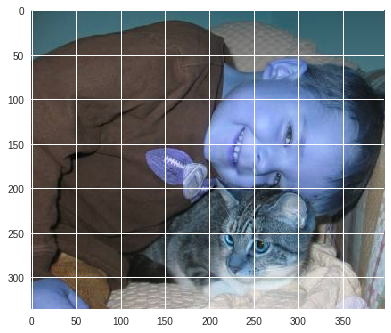

In [21]:
##### To Predict on a New Unseen Image
##### Step1 Laod an unseen image
image = cv2.imread("data/dogscats/valid/cats/cat.8519.jpg")
plt.imshow(image)
plt.show()

In [22]:
##### Flatten the test image
test_feature = cv2.resize(image, (32, 32))
print(test_feature.shape)

##### Reshape the test image shape to match the network thats expecting a set of images
test_feature = test_feature.reshape(-1,test_feature.shape[0],test_feature.shape[1],test_feature.shape[2])
print(test_feature.shape)


(32, 32, 3)
(1, 32, 32, 3)


In [23]:
##### Print Predictions
test_prediction = model.predict(test_feature)
print("[INFO] CAT={:.10f}%, DOG: {:.10f}%".format(test_prediction[0][0]*100, test_prediction[0][1]*100))

[INFO] CAT=0.0000000000%, DOG: 100.0000000000%


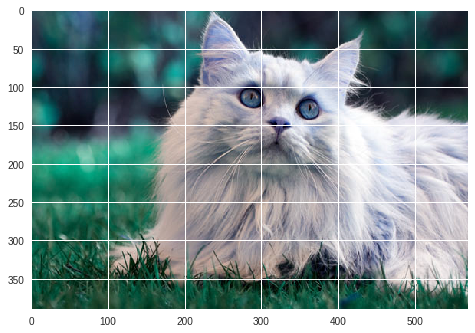

In [52]:
##### To Predict on a New Unseen Image
##### Step1 Laod an unseen image from a url
#image = cv2.imread("data/dogscats/valid/cats/cat.8519.jpg",0)
url1='https://www.petmd.com/sites/default/files/shutterstock_54135856-slide2.jpg'
image = imutils.url_to_image(url1)
#url2='https://raw.githubusercontent.com/pracasrv/machine-learning-getting-started-ws/master/images/dog2.jpeg'
#image = imutils.url_to_image(url2)

plt.imshow(image)
plt.show()


In [53]:
##### Preprocess the test image
test_feature = cv2.resize(image, (32, 32))

print(test_feature.shape)
print(test_feature.shape)

test_feature = test_feature.reshape(-1,test_feature.shape[0],test_feature.shape[1],test_feature.shape[2])

prediction = model.predict_classes(test_feature)
print(prediction)
print(le.inverse_transform(prediction))

(32, 32, 3)
(32, 32, 3)
[0] [[1. 0.]]


In [0]:
from keras.models import model_from_json
# serialize model to JSON
model_json = model.to_json()
with open("cats_dogs_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("cats_dogs_model.h5")
print("Saved model to disk")

In [0]:
!ls
from google.colab import files
files.download('cats_dogs_model.json') 
files.download('cats_dogs_model.h5') 

In [0]:
# load json and create model
json_file = open('cats_dogs_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("cats_dogs_model.h5")
print("Loaded model from disk")

In [ ]:
prediction = loaded_model.predict_classes(test_feature)
print(prediction)
print(le.inverse_transform(prediction))